In [1]:
%pylab inline
from scipy import linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Ellipse
from pygadgetreader import *

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Reduced Inertia tensor

$I_{i,j} = \sum_{x_n V} \dfrac{x_{n}^{(i)} x_{n}^{(j)}}{d_n^2}$

$d_n^2 = x_n^2 + y_n^2/q^2 + z_n^2/s^2$

$q =b/a$

$s = c/a$

$c\leq b \leq a$


# 1. Is the volume being conserved in this?

In [260]:
def A(V, x_cm, y_cm, z_cm):
    R = np.sqrt((V[0,:] - x_cm)**2 + (V[1,:] - y_cm)**2 + (V[2,:] - z_cm)**2)
    index = where(R == max(R))[0]
    return R[index]

- Function RIT computes the reduced inertia tensor which is a symmetric tensor.

In [261]:
def RIT(XYZ, q, s):
    I = np.zeros([3, 3])
    N = len(XYZ[0])
    for i in range(3):
        for j in range(3):
            XX = np.zeros(N)
            for n in range(N):
                d = np.sqrt(XYZ[0,n]**2.0 + XYZ[1,n]**2.0/q**2.0 + XYZ[2,n]**2.0/s**2.0)
                Xi = XYZ[i,n]
                Xj = XYZ[j,n]
                XX[n] = Xi * Xj / d**2.0
            I[i][j] = sum(XX)
    return I

In [262]:
# Make a matrix (3, 10) from coordinates x, y, z
def one_tensor(x, y, z):
    N = len(x)
    XYZ = zeros([3,N])
    XYZ[0,:] = x
    XYZ[1,:] = y
    XYZ[2,:] = z
    return XYZ

In [786]:
def sphere(n_points, radius):
    phi = random.rand(n_points) * 2 * pi
    theta = random.rand(n_points) * 2 - 1
    R = random.rand(n_points) * radius
    X = R**(1/3.0) * sin(phi) * sin(arccos(theta))
    Y = R**(1/3.0) * cos(phi) * sin(arccos(theta))
    Z = R**(1/3.0) * cos(arccos(theta))
    return X, Y, Z

def cube(n_points, theta):
    X = (random.rand(n_points)*2.0 -1.0)  
    Y = random.rand(n_points) *2.0 - 1.0
    Z = (random.rand(n_points) ) *2.0 - 1.0
    X1 =  cos(theta) * X + sin(theta) * Y
    Y1 =  -sin(theta) * X + cos(theta) * Y
    Z1 =  Z  
    return X1, Y1, Z1

In [787]:
def projection(x1, y1, x2, z2, y3, z3):
    figure(figsize=(17, 5))
    subplot(1, 3, 1)
    scatter(x1, y1, s=1)
    xlim(-10, 10)
    ylim(-10, 10)
    xlabel('$x$', fontsize=25)
    ylabel('$y$', fontsize=25)
    
    subplot(1, 3, 2)
    scatter(x2, z2, s=1)
    xlim(-10, 10)
    ylim(-10, 10)
    xlabel('$x$', fontsize=25)
    ylabel('$z$', fontsize=25)
    
    subplot(1, 3, 3)
    scatter(y3, z3, s=1)
    xlim(-10, 10)
    ylim(-10, 10)
    xlabel('$y$', fontsize=25)
    ylabel('$z$', fontsize=25)
    
    
def projection2(x, y, z, X1, Y1, Z1):
    figure(figsize=(17, 5))
    #index1 = np.where(np.abs(z)>1.5)[0]
    subplot(1, 3, 1)
    scatter(x, y, c='r')
    scatter(X1, Y1, s=1)
    xlim(-10, 10)
    ylim(-10, 10)
    xlabel('$x$', fontsize=25)
    ylabel('$y$', fontsize=25)
    
    subplot(1, 3, 2)
    #index2 = np.where(np.abs(y)<0.1)[0]
    scatter(x, z, c='r')
    scatter(X1, Z1, s=1)
    xlim(-10, 10)
    ylim(-10, 10)
    xlabel('$x$', fontsize=25)
    ylabel('$z$', fontsize=25)
    
    subplot(1, 3, 3)
    #index3 = np.where(np.abs(x)<0.1)[0]
    scatter(y, z, c='r')
    scatter(Y1, Z1, s=1)
    xlim(-10, 10)
    ylim(-10, 10)
    xlabel('$y$', fontsize=25)
    ylabel('$z$', fontsize=25)

The eigenvalues of the intertia tensor are related with the lenght of the
major axis as:
    
$a, b, c = \sqrt{\lambda_a, \lambda_b, \lambda_c}$

where:
    
$\lambda_a \leq \lambda_b \leq \lambda_c$
    


In [788]:
def Shape(XYZ, tol):
    old_q = 1.2
    old_s = 1.2
    new_q = 1.0
    new_s = 1.0 
    total_rot = np.ones([3,3])
    #evec_f = np.ones([3, 3])
    while((abs(new_s - old_s) > tol) & (abs(new_q - old_q) > tol)):
        old_s = new_s
        old_q = new_q
        I_test = RIT(XYZ, old_q, old_s)
        eival, evec = eig(I_test)
        total_rot = dot(evec.T, total_rot)
        oeival = sort(eival)
        XYZ = dot(evec.T, XYZ)
        #print oeival
        la = oeival[2]
        lb = oeival[1] 
        lc = oeival[0]
        #evec_f = np.dot(evec.T, evec_f)
        new_q = np.sqrt(lb/la)
        new_s = np.sqrt(lc/la)
    return new_s, new_q, XYZ, evec, eival, total_rot

In [789]:
x, y, z = cube(5000,0)

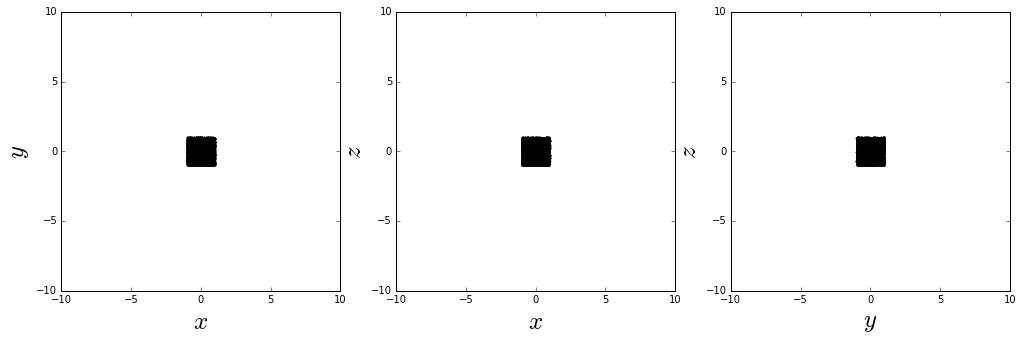

In [790]:
projection(x, y, x, z, y, z)

- The eigenvalues represents the axis ratios of the new set of principal axis. These values are related with $s$ and $q$
- The eigenvectors gives the rotation matrix to allign the halo with the principal axis.

In [791]:
cube_xyz = one_tensor(x, y, z)
s, q, R, b_evec, beival, Trot = Shape(cube_xyz, 1E-3)
print s, q 
print beival
print eival
print b_evec
#print Trot

0.966444563051 0.976003666669
[ 1668.62022748  1589.49952472  1558.51647771]
[ 4022.15294885   497.24272784   480.60432331]
[[ 0.9999721  -0.00631818  0.00398483]
 [-0.00636195 -0.9999185   0.01106913]
 [-0.00391457  0.01109417  0.9999308 ]]


## Projections after finding the principal axis, $s$ and $q$

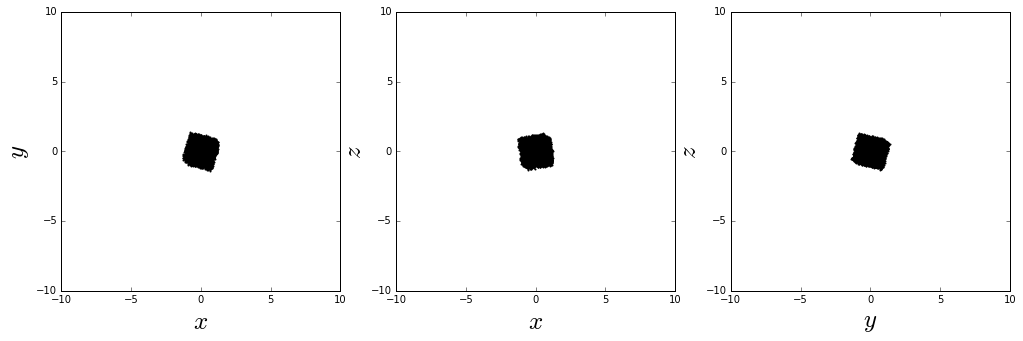

In [792]:
projection(R[0,:], R[1,:], R[0,:], R[2,:], R[1,:], R[2,:])

-----------------------------------------------------------------------

-----------------------------------------------------------------------

-----------------------------------------------------------------------

-----------------------------------------------------------------------

-----------------------------------------------------------------------

In [782]:
def Ellipsoid(a, b, c):
    phi = np.random.rand(1000) * 2 - 1
    theta = (np.random.rand(1000) * 2 * np.pi)
    x = a * np.sin(np.arccos(phi)) * np.cos(theta)
    y = b * np.sin(np.arccos(phi)) * np.sin(theta)
    z = c * np.cos(np.arccos(phi))
    return x, y, z

In [793]:
a = A(cube_xyz,0,0,0)
print a, q, s

[ 1.67581198] 0.976003666669 0.966444563051


In [795]:
x1, y1, z1 = Ellipsoid(a, q*a, s*a)

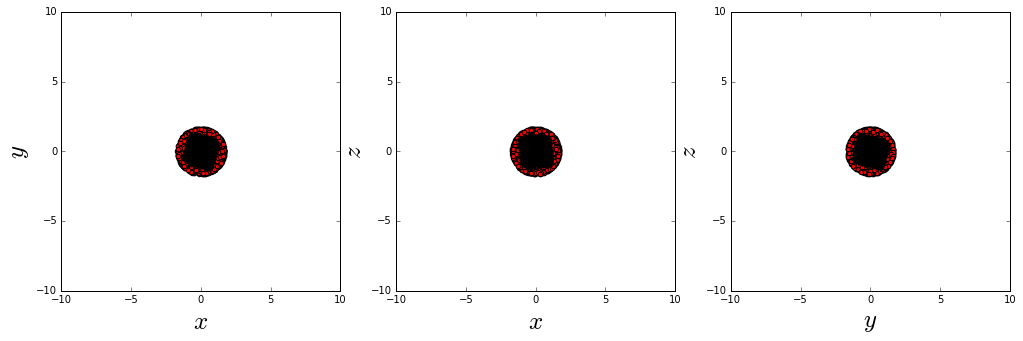

In [796]:
projection2(x1, y1, z1, R[0,:], R[1,:], R[2,:])

In [768]:
elips = one_tensor(x1, y1, z1)
I_test = RIT(cube_xyz, 1, 1)
eival, evec = eig(I_test)
print eival
print evec
print '-------------'
print evec[0]
xtest = np.ones(3)
print dot(evec[0], xtest) * np.sqrt(eival[0])

print '-------------'
print evec[1]
xtest = np.ones(3)
print dot(evec[1], xtest) * np.sqrt(eival[1])

[ 4022.15294885   497.24272784   480.60432331]
[[-0.57375157 -0.67157121  0.46882965]
 [-0.57597857 -0.07611714 -0.81391331]
 [-0.58228672  0.73701987  0.34313829]]
-------------
[-0.57375157 -0.67157121  0.46882965]
-49.2455406801
-------------
[-0.57597857 -0.07611714 -0.81391331]
-32.6904472014


In [769]:
test_vec = np.array([1, 0, 0])
print test_vec
vec_new = dot(Trot, test_vec)
print vec_new
#print evec[2]
print dot(evec.T, vec_new)

[1 0 0]
[ -1.73202693e+00   7.57889861e-04   9.06255002e-03]
[ 0.98803965  1.16980101 -0.80953273]


In [770]:
XYZ_e_rot = dot(evec, elips)
shape(XYZ_e_rot)

(3, 1000)

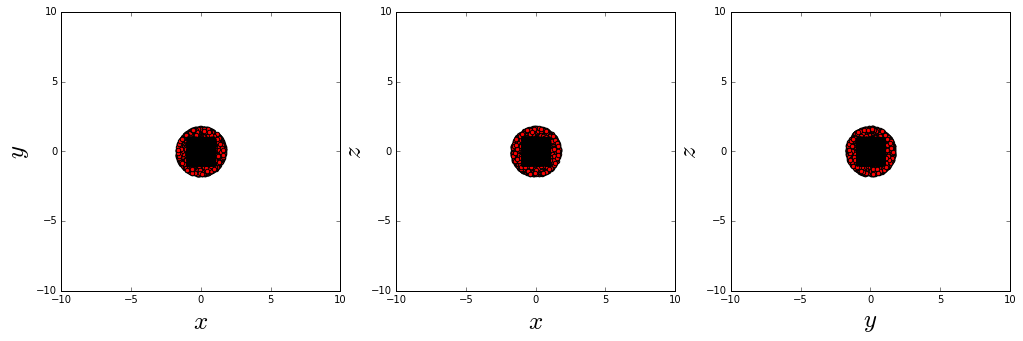

In [742]:
projection2(XYZ_e_rot[0,:], XYZ_e_rot[1,:], XYZ_e_rot[2,:], x, y, z)

In [803]:
evec

array([[-0.57375157, -0.67157121,  0.46882965],
       [-0.57597857, -0.07611714, -0.81391331],
       [-0.58228672,  0.73701987,  0.34313829]])

In [744]:
arccos(evec)*180.0/(2*pi)

array([[ 24.1151242 ,  28.1624195 ,  30.03949892],
       [ 42.361975  ,  26.47064734,  71.21941164],
       [ 21.12843639,  62.51192975,  55.25742176]])

In [726]:
xunit = np.array([1, 0, 0])
yunit = np.array([0, 1, 0])
zunit = np.array([0, 0, 1])

x_prime = dot(evec, xunit)
y_prime = dot(evec, yunit)
z_prime = dot(evec, zunit)


print dot(xunit, x_prime)
print dot(yunit, y_prime)
print dot(zunit, z_prime)


0.666138815178
0.602632989875
-0.350450031621


In [675]:
print eival
index_h = np.where(eival == max(eival))
index_l = np.where(eival == min(eival))
index_m = np.where((eival != min(eival)) & (eival != max(eival)))

print eival[index_h]
print eival[index_l]
print eival[index_m]


print np.sqrt(eival[0])

[ 1724.1418252   1647.49031257  1628.36786223]
[ 1724.1418252]
[ 1628.36786223]
[ 1647.49031257]
41.5227868188


(-10, 10)

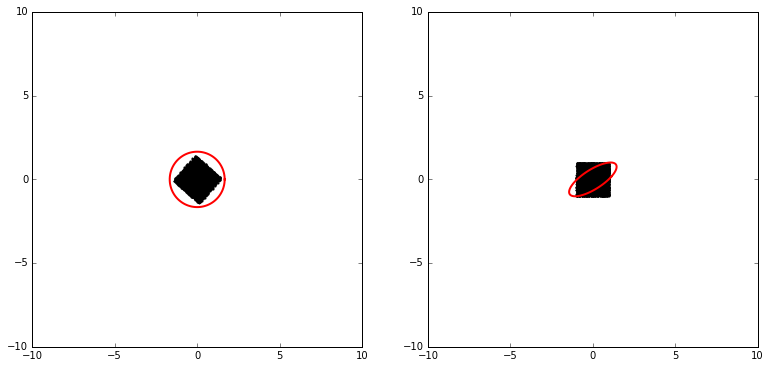

In [734]:
figure(figsize(13, 6))
subplot(1, 2, 1)
u = np.linspace(0, 2 * np.pi, 100)
xt = a*cos(u)
yt = a*q*sin(u)
#zt = a*s*sin(u)
scatter(R[0,:], R[1,:], s=1)
zt = np.zeros(100)
plot(xt, yt, lw=2, c='r')
ylim(-10, 10)
xlim(-10, 10)


subplot(1, 2, 2)
firstrot = one_tensor(xt, yt, zt)
new_frame = dot(evec, firstrot)
scatter(x, y, s=1)
plot(new_frame[0,:], new_frame[1,:], lw=2, c='r')
ylim(-10, 10)
xlim(-10, 10)

(-10, 10)

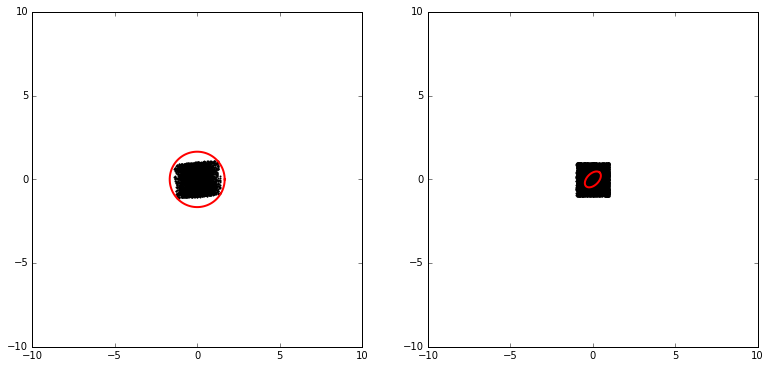

In [715]:
figure(figsize(13, 6))
subplot(1, 2, 1)
xt2 = cos(u)
yt2 = sin(u)
scatter(R[0,:], R[2,:], s=1)
plot(xt2*a, yt2*q*a, lw=2, c='r')
ylim(-10, 10)
xlim(-10, 10)

subplot(1, 2, 2)
secondrot = one_tensor(xt2, zt, yt2)
new_frame2 = dot(evec, secondrot)
plot(new_frame2[0,:]*a, new_frame2[2,:]*a*q, lw=2, c='r')
scatter(x, z, s=1)
ylim(-10, 10)
xlim(-10, 10)

(-10, 10)

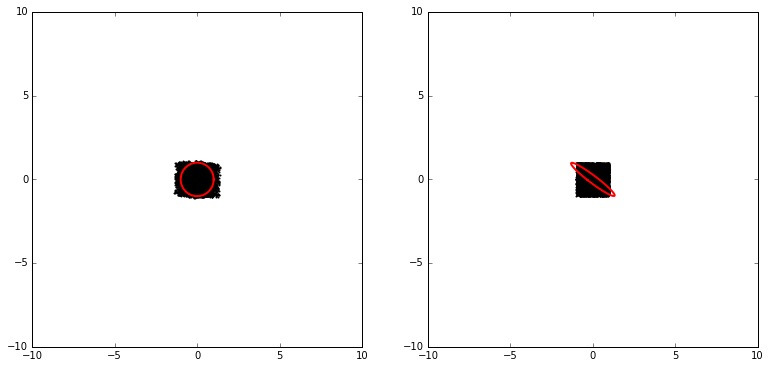

In [703]:
figure(figsize(13, 6))
subplot(1, 2, 1)
xt3 = cos(u)
yt3 = sin(u)
scatter(R[1,:], R[2,:], s=1)
plot(xt3, yt3, lw=2, c='r')
ylim(-10, 10)
xlim(-10, 10)

subplot(1, 2, 2)
thirdrot = one_tensor(zt, xt3, yt3)
new_frame3 = dot(evec, thirdrot)
plot(new_frame3[1,:]*s*a, new_frame3[2,:]*q*a, lw=2, c='r')
scatter(y, z, s=1)
ylim(-10, 10)
xlim(-10, 10)

In [709]:
el = Ellipse((0, 0), 10, 20, facecolor='r', alpha=0.5)
print type(0)

<type 'int'>


In [585]:
# Simulated output

In [40]:
positions = readsnap('../LMC-MW/data/LMCMW/MW1LMC4/HRchervinMW/MW1newLMC4-3_a1H6_001','pos', 'dm')
ids = readsnap('../LMC-MW/data/LMCMW/MW1LMC4/HRchervinMW/MW1newLMC4-3_a1H6_001','pid', 'dm')

Returning DM    Positions
Returning DM    Particle IDs


In [41]:
positionsf = readsnap('../LMC-MW/data/LMCMW/MW1LMC4/HRchervinMW/MW1newLMC4-3_a1H6_020','pos', 'dm')
idsf = readsnap('../LMC-MW/data/LMCMW/MW1LMC4/HRchervinMW/MW1newLMC4-3_a1H6_020','pid', 'dm')

Returning DM    Positions
Returning DM    Particle IDs


In [42]:
Xdm, Ydm, Zdm = positions[:,0], positions[:,1], positions[:,2]

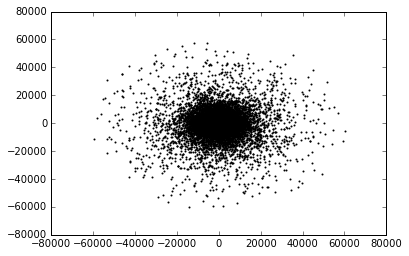

In [43]:
scatter(Xdm, Ydm, s=1)

In [44]:
ID = np.sort(ids)
print ID[0]
Nhalo = 1000000
MW = np.where(ids<ID[Nhalo])[0]
LMC = np.where(ids>=ID[Nhalo])[0]

IDf = np.sort(idsf)
Nhalo = 1000000
MWf = np.where(idsf<IDf[Nhalo])[0]
LMCf = np.where(idsf>=IDf[Nhalo])[0]

1


In [45]:
print len(MWf), len(LMCf)

1000000 300000


In [46]:
xmw, ymw, zmw = positions[MW,0], positions[MW,1], positions[MW,2]
xlmc, ylmc, zlmc = positions[LMC,0], positions[LMC,1], positions[LMC,2]

xmwf, ymwf, zmwf = positionsf[MWf,0], positionsf[MWf,1], positionsf[MWf,2]
xlmcf, ylmcf, zlmcf = positionsf[LMCf,0], positionsf[LMCf,1], positionsf[LMCf,2]

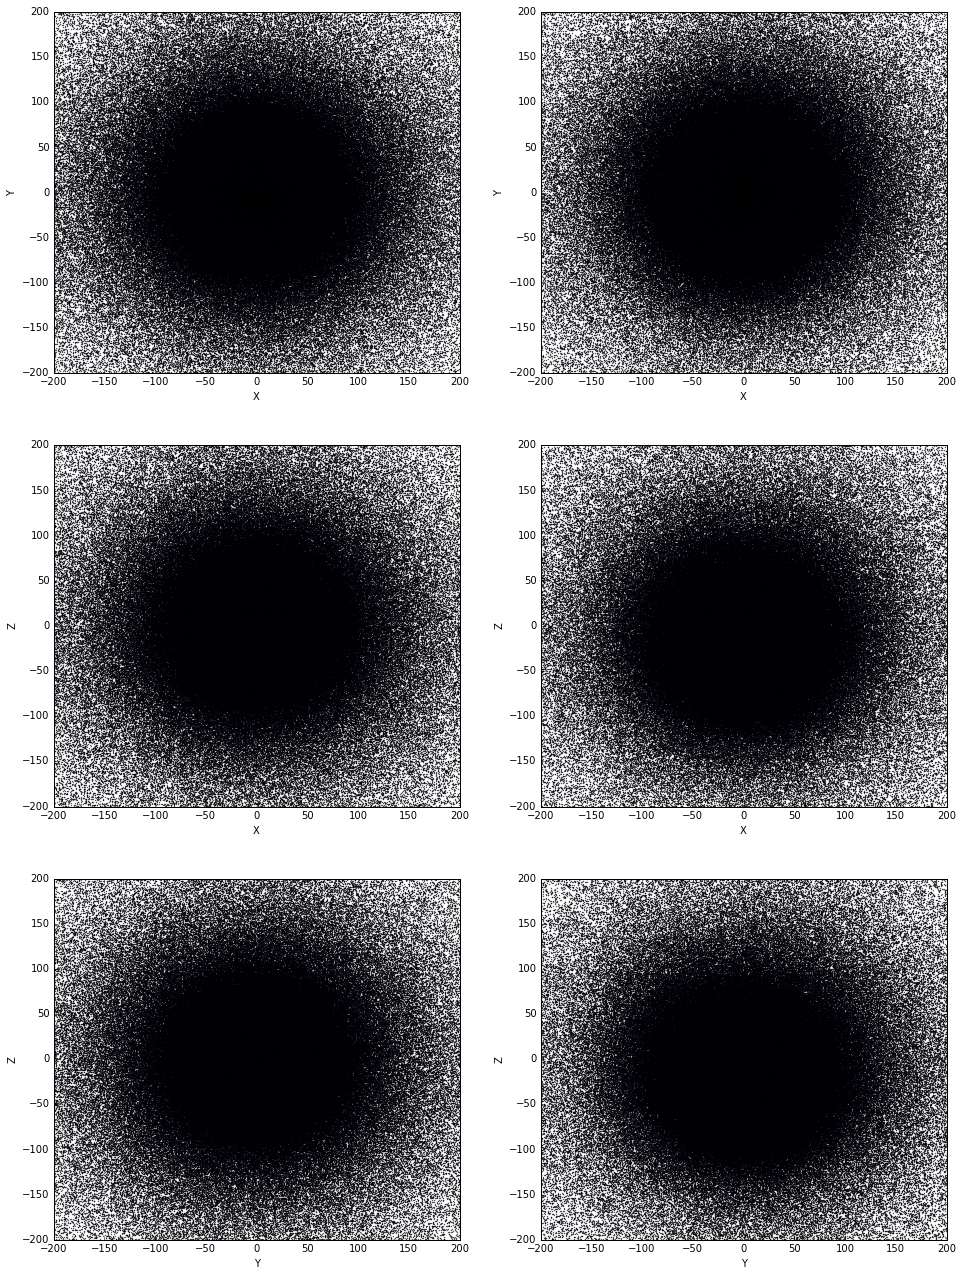

In [47]:
figure(figsize(16, 22))
subplot(3, 2, 1)
scatter(xmw, ymw, s=0.1)
xlim(-200, 200)
ylim(-200, 200)
xlabel('X')
ylabel('Y')

subplot(3, 2, 2)
scatter(xmwf, ymwf, s=0.1)
xlabel('X')
ylabel('Y')
xlim(-200, 200)
ylim(-200, 200)

subplot(3, 2, 3)
scatter(xmw, zmw, s=0.1)
xlim(-200, 200)
ylim(-200, 200)
xlabel('X')
ylabel('Z')

subplot(3, 2, 4)
scatter(xmwf, zmwf, s=0.1)
xlim(-200, 200)
ylim(-200, 200)
xlabel('X')
ylabel('Z')

subplot(3, 2, 5)
scatter(ymw, zmw, s=0.1)
xlim(-200, 200)
ylim(-200, 200)
xlabel('Y')
ylabel('Z')

subplot(3, 2, 6)
scatter(ymwf, zmwf, s=0.1)
xlim(-200, 200)
ylim(-200, 200)
xlabel('Y')
ylabel('Z')

In [49]:
Rvircut = np.where(np.sqrt(xmw**2 + ymw**2 + zmw**2)<150)
xmw = xmw[Rvircut]
ymw = ymw[Rvircut]
zmw = zmw[Rvircut]

Rvircutf = np.where(np.sqrt(xmwf**2 + ymwf**2 + zmwf**2)<150)
xmwf = xmwf[Rvircutf]
ymwf = ymwf[Rvircutf]
zmwf = zmwf[Rvircutf]


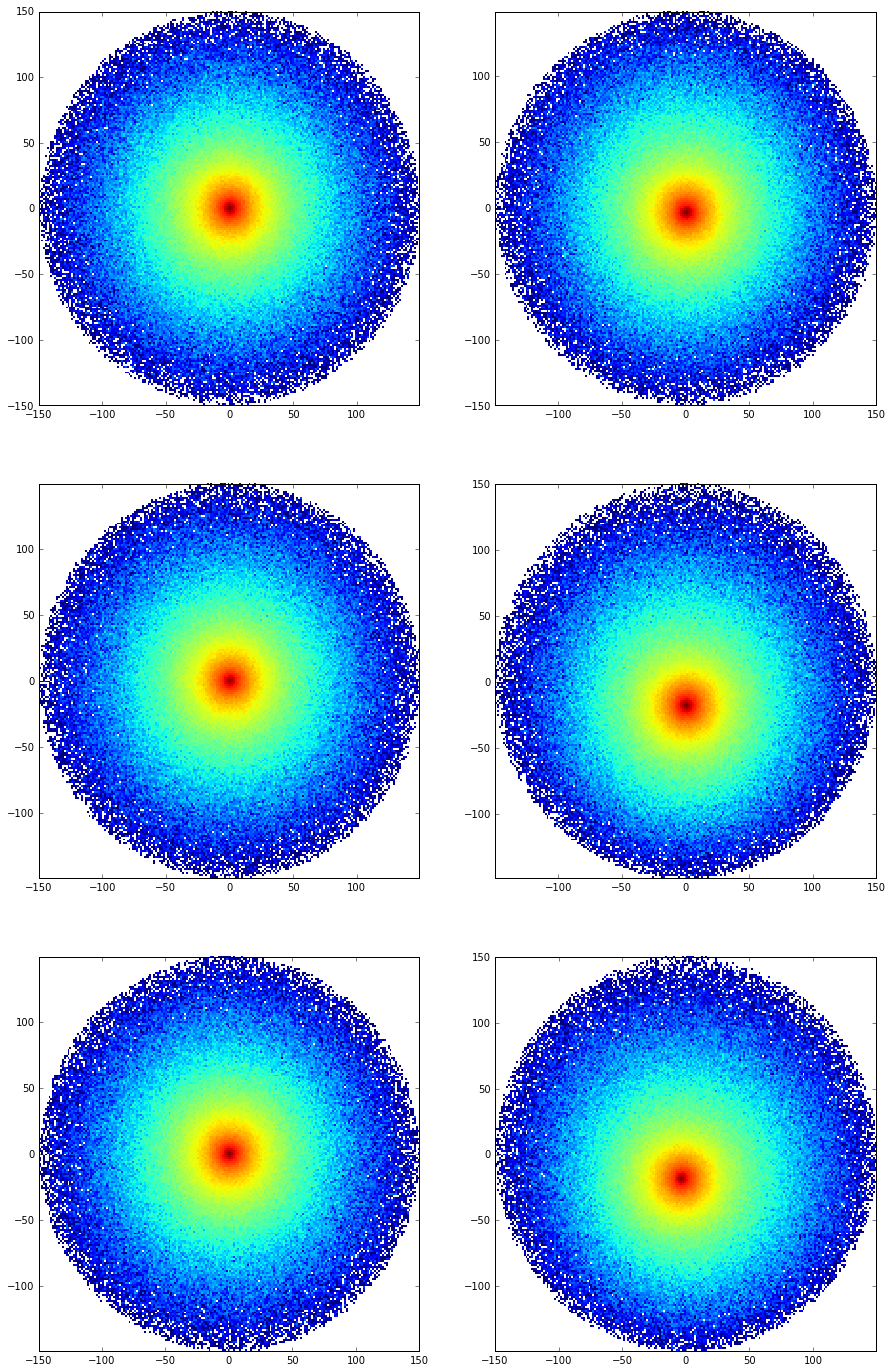

In [148]:
figure(figsize(15, 24))
subplot(3, 2, 1)
htest = hist2d(xmw, ymw, bins=200, norm=mpl.colors.LogNorm())

subplot(3, 2, 2)
htest = hist2d(xmwf, ymwf, bins=200, norm=mpl.colors.LogNorm())

subplot(3, 2, 3)
htest = hist2d(xmw, zmw, bins=200, norm=mpl.colors.LogNorm())

subplot(3, 2, 4)
htest = hist2d(xmwf, zmwf, bins=200, norm=mpl.colors.LogNorm())

subplot(3, 2, 5)
htest = hist2d(ymw, zmw, bins=200, norm=mpl.colors.LogNorm())

subplot(3, 2, 6)
htest = hist2d(ymwf, zmwf, bins=200, norm=mpl.colors.LogNorm())

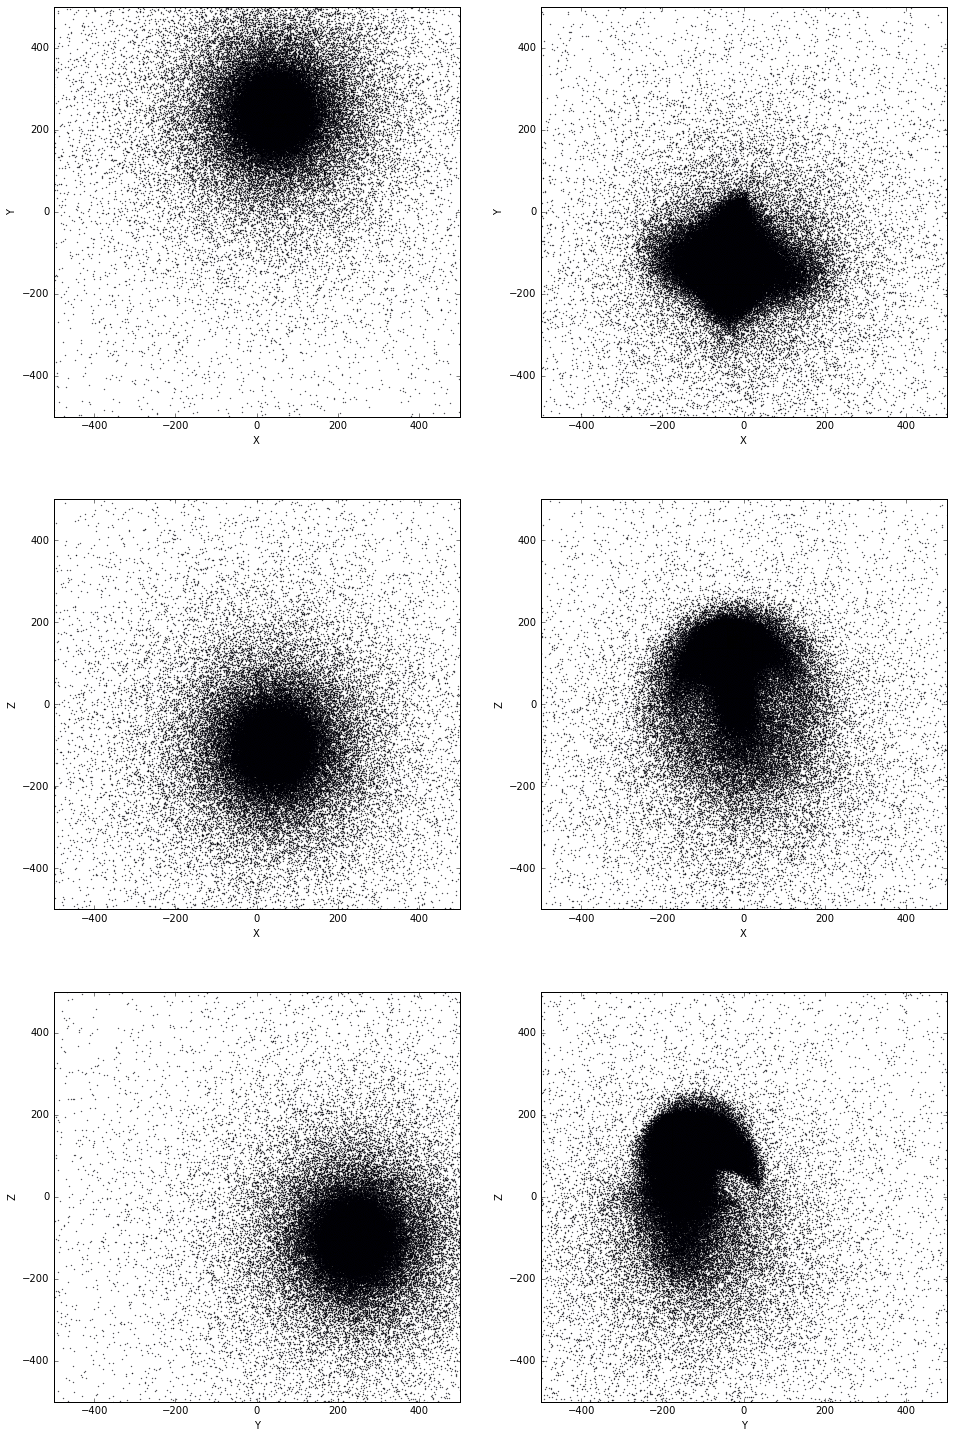

In [130]:
figure(figsize(16, 25))
subplot(3, 2, 1)
scatter(xlmc, ylmc, s=0.1)
xlim(-500, 500)
ylim(-500, 500)
xlabel('X')
ylabel('Y')

subplot(3, 2, 2)
scatter(xlmcf, ylmcf, s=0.1)
xlim(-500, 500)
ylim(-500, 500)
xlabel('X')
ylabel('Y')

subplot(3, 2, 3)
scatter(xlmc, zlmc, s=0.1)
xlim(-500, 500)
ylim(-500, 500)
xlabel('X')
ylabel('Z')

subplot(3, 2, 4)
scatter(xlmcf, zlmcf, s=0.1)
xlim(-500, 500)
ylim(-500, 500)
xlabel('X')
ylabel('Z')

subplot(3, 2, 5)
scatter(ylmc, zlmc, s=0.1)
xlim(-500, 500)
ylim(-500, 500)
xlabel('Y')
ylabel('Z')

subplot(3, 2, 6)
scatter(ylmcf, zlmcf, s=0.1)
xlim(-500, 500)
ylim(-500, 500)
xlabel('Y')
ylabel('Z')

In [590]:
rlmc = one_tensor(xlmc, ylmc, zlmc)
slmc, qlmc, Rlmc, b_evec = Shape(rlmc, 1E-3)



KeyboardInterrupt: 

In [ ]:
rmw = one_tensor(xmw, ymw, zmw)
smw, qmw, Rmw, b_evecmw = Shape(rmw, 1E-3)

In [ ]:
rlmcf = one_tensor(xlmcf, ylmcf, zlmcf)
slmcf, qlmcf, Rlmcf, b_evecf = Shape(rlmcf, 1E-3)

In [ ]:
rmwf = one_tensor(xmwf, ymwf, zmwf)
smwf, qmwf, Rmwf, b_evecmwf = Shape(rmwf, 1E-3)

In [ ]:
print smw, qmw
print smwf, qmwf

In [57]:
amw = A(rmw,-9,-11,2.93)
amwf = A(rmwf,3,-0.6,-2.0)

#almc = A(rlmc,40,251,-110)
#almcf = A(rlmc,-39.182247, -118.708282, 80.136894)

print amw, amwf#, almc, almcf

 [ 164.49674105] [ 153.5771129]


In [168]:
#xemwf, yemwf, zemwf = Ellipsoid(amwf, qmwf*amwf, smwf*amwf)
#xemw, yemw, zemw = Ellipsoid(amw, qmw*amw, smw*amw)

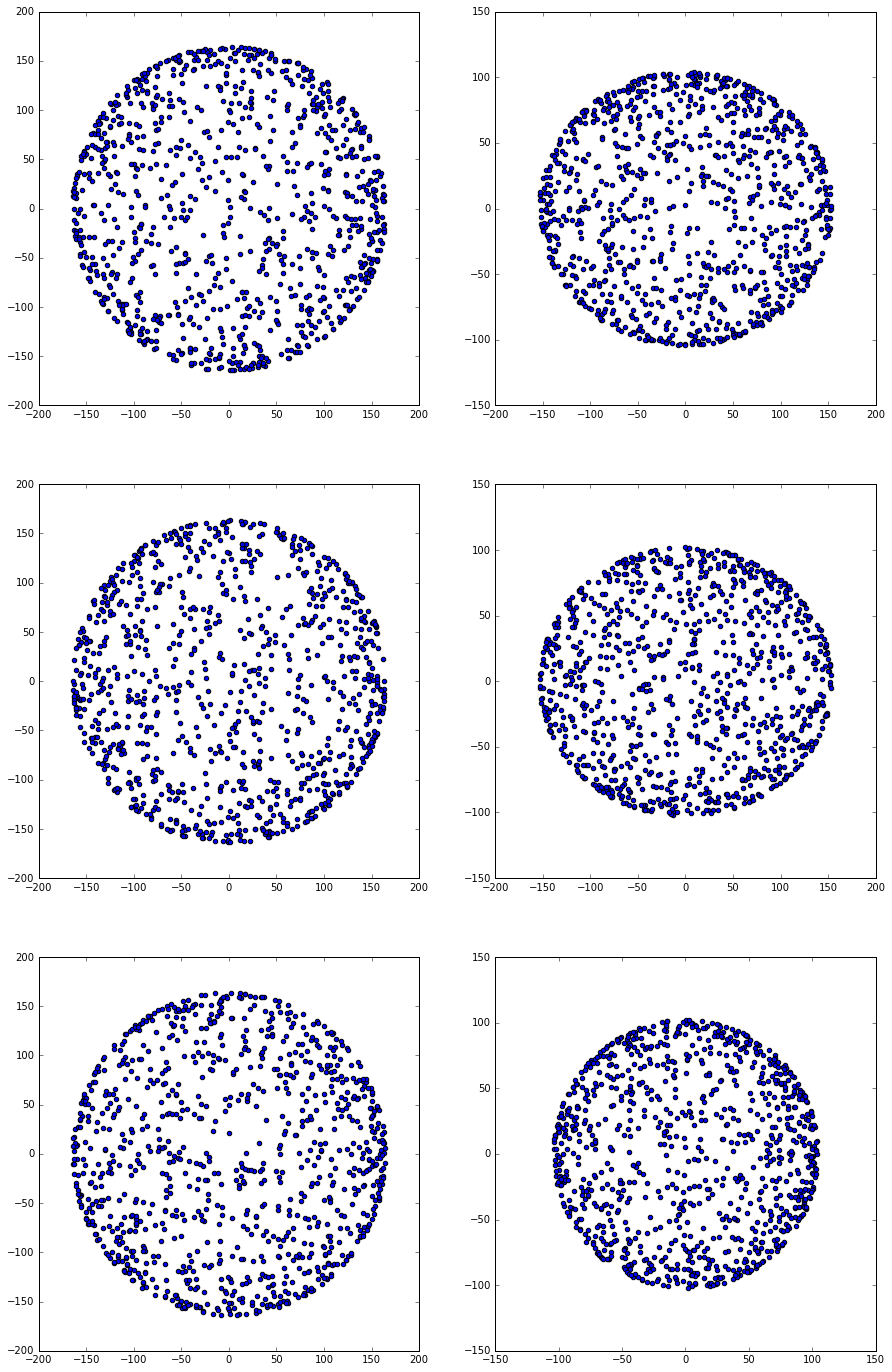

In [171]:
figure(figsize=(15, 24))

subplot(3, 2, 1)
scatter(xemw, yemw)

subplot(3, 2, 2)
scatter(xemwf, yemwf)

subplot(3, 2, 3)
scatter(xemw, zemw)

subplot(3, 2, 4)
scatter(xemwf, zemwf)

subplot(3, 2, 5)
scatter(yemw, zemw)

subplot(3, 2, 6)
scatter(yemwf, zemwf)

In [ ]:
sa